# Proyek Analisis Data: Bike Sharing
- Nama: Novi Adi Triswandi
- Email: icambing@gmail.com
- Id Dicoding: https://www.dicoding.com/users/noviadi/

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda berubah sepanjang tahun? Adakah pola musiman yang jelas?
- Bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) mempengaruhi jumlah penggunaan sepeda?
- Apa perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan? Apakah ada perbedaan signifikan dalam jumlah penggunaan sepeda berdasarkan jam dalam sehari?

## Menyiapkan semua library yang dibuthkan

In [ ]:
import pandas as pd
from datetime import time
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Memuat tabel day

In [ ]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat tabel hour

In [ ]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan info di atas terdapat 731 entri dengan 16 kolom dan tidak ada nilai null yang terdeteksi.
Untuk jenis data kolom dteday bernilai object, mungkin perlu dikonversi menjadi tipe data Date untuk analisis yang lebih mudah

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Berdasarkan info di atas terdapat 17.379 entri dengan 18 kolom dan tidak ada nilai null yang terdeteksi.
Untuk jenis data kolom dteday bernilai object, mungkin perlu dikonversi menjadi tipe data Date untuk analisis yang lebih mudah.

### Cleaning Data

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
print("Informasi Dataframe Day.csv setelah cleaning:")
day_df.info()

Informasi Dataframe Day.csv setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [ ]:
print("Informasi Dataframe Hour.csv setelah cleaning:")
hour_df.info()

Informasi Dataframe Hour.csv setelah cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-n

## Exploratory Data Analysis (EDA)

Pertanyaan 1 : Bagaimana tren penggunaan sepeda berubah sepanjang tahun? Adakah pola musiman yang jelas?

In [ ]:
day_df.describe(include="all")

<ipython-input-40-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Mengelompokkan data penggunaan sepeda berdasarkan tahun dan bulan, dan kemudian menghitung rata-rata nilai dalam kolom 'cnt' untuk setiap grup tahun dan bulan tersebut.

In [ ]:
day_df.groupby(['yr','mnth']).agg({
    'cnt': np.mean
})

cnt
yr mnth             
0  1     1231.903226
   2     1721.964286
   3     2065.967742
   4     3162.333333
   5     4381.322581
   6     4783.733333
   7     4559.387097
   8     4409.387097
   9     4247.266667
   10    3984.225806
   11    3405.566667
   12    2816.870968
1  1     3120.774194
   2     3556.448276
   3     5318.548387
   4     5807.466667
   5     6318.225806
   6     6761.000000
   7     6567.967742
   8     6919.451613
   9     7285.766667
   10    6414.225806
   11    5088.800000
   12    3990.741935

Pertanyaan 2 : Bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) mempengaruhi jumlah penggunaan sepeda?

Menampilkan deskripsi data

In [ ]:
day_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].describe()

,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,4504.348837
std,0.183051,0.162961,0.142429,0.077498,1937.211452
min,0.059130,0.079070,0.000000,0.022392,22.000000
25%,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,0.655417,0.608602,0.730209,0.233214,5956.000000
max,0.861667,0.840896,0.972500,0.507463,8714.000000


Menghitung matriks korelasi

In [ ]:
weather_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_df[weather_features].corr()

Pertanyaan 3 : Apa perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan? Apakah ada perbedaan signifikan dalam jumlah penggunaan sepeda berdasarkan jam dalam sehari?

Menampilkan deskripsi data yang diperlukan

In [ ]:
hour_df[['hr', 'workingday', 'cnt']].describe()

,hr,workingday,cnt
count,17379.000000,17379.000000,17379.000000
mean,11.546752,0.682721,189.463088
std,6.914405,0.465431,181.387599
min,0.000000,0.000000,1.000000
25%,6.000000,0.000000,40.000000
50%,12.000000,1.000000,142.000000
75%,18.000000,1.000000,281.000000
max,23.000000,1.000000,977.000000


Menambahkan kolom untuk menandai akhir pekan

In [ ]:
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

In [ ]:
Mengelompokkan dan mengambil rata-rata penggunaan sepeda berdasarkan jam dan tipe hari

In [ ]:
hour_df.groupby(['hr', 'is_weekend']).agg({'cnt': 'mean'}).reset_index()


,hr,is_weekend,cnt
0,0,0,37.626692
1,0,1,94.148325
2,1,0,17.464078
3,1,1,72.583732
4,2,0,9.377953
5,2,1,55.980676
6,3,0,5.188525
7,3,1,26.995215
8,4,0,5.446939
9,4,1,8.497585


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berubah sepanjang tahun? Adakah pola musiman yang jelas?

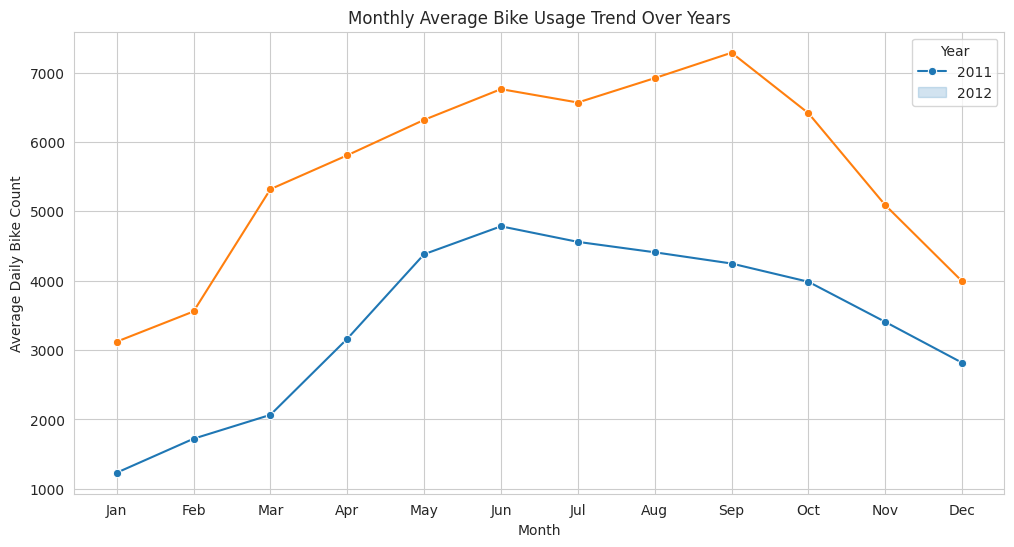

In [ ]:
# Visualisasi 1: Tren dan Musiman
# Mengelompokkan data berdasarkan bulan dan tahun untuk melihat tren
monthly_trend = day_df.groupby(['yr', 'mnth']).agg({'cnt': np.mean}).reset_index()

# Memplot tren bulanan selama tahun 2011 & 2012
sns.lineplot(data=monthly_trend, x='mnth', y='cnt', hue='yr', marker="o")
plt.title('Monthly Average Bike Usage Trend Over Years')
plt.xlabel('Month')
plt.ylabel('Average Daily Bike Count')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year', labels=['2011', '2012'])

# Menampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca (suhu, kelembaban, kecepatan angin) mempengaruhi jumlah penggunaan sepeda?

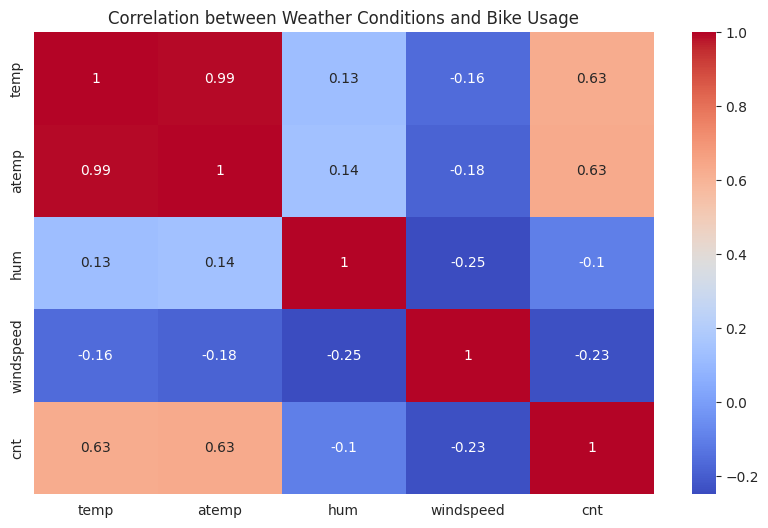

In [ ]:
# Visualisasi 2: Pengaruh Kondisi Cuaca
# Matriks korelasi antara kondisi cuaca dan penggunaan sepeda
weather_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
correlation_matrix = day_df[weather_features].corr()

# Heatmap untuk matriks korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Weather Conditions and Bike Usage')

# Menampilkan plot
plt.show()

### Pertanyaan 3: Apa perbedaan pola penggunaan sepeda antara hari kerja dan akhir pekan? Apakah ada perbedaan signifikan dalam jumlah penggunaan sepeda berdasarkan jam dalam sehari?

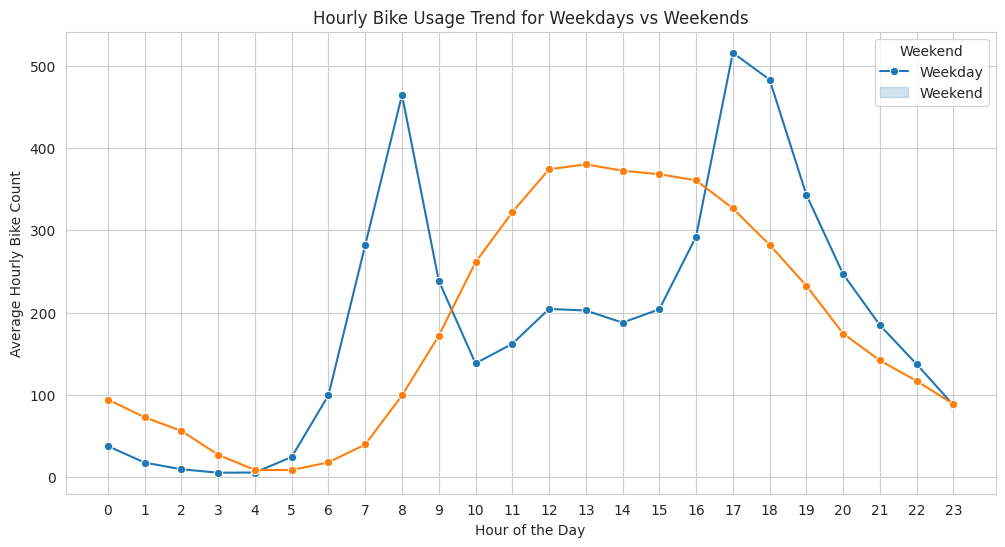

In [ ]:
# Visualisasi 3: Perilaku Pengguna dalam Keseharian
# Menambahkan kolom untuk menandai akhir pekan
hour_df['is_weekend'] = hour_df['weekday'].apply(lambda x: 1 if x in [0, 6] else 0)

# Mengelompokkan data berdasarkan jam dalam sehari dan tipe hari (hari kerja vs akhir pekan)
hourly_trend = hour_df.groupby(['hr', 'is_weekend']).agg({'cnt': 'mean'}).reset_index()

# Plotting tren penggunaan sepeda berdasarkan jam dan tipe hari
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trend, x='hr', y='cnt', hue='is_weekend', marker="o")
plt.title('Hourly Bike Usage Trend for Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Hourly Bike Count')
plt.xticks(np.arange(0, 24))
plt.legend(title='Weekend', labels=['Weekday', 'Weekend'])

# Menampilkan plot
plt.show()

## Conclusion

Pertanyaan 1:
Data menunjukkan adanya pola musiman yang jelas dalam penggunaan sepeda. Penggunaan sepeda meningkat secara signifikan selama bulan-bulan hangat, dengan puncaknya di sekitar bulan Juni hingga September. Hal ini menunjukkan bahwa cuaca hangat dan kondisi musiman berperan penting dalam meningkatkan penggunaan sepeda.

Pertanyaan 2: Suhu hangat memiliki korelasi positif yang kuat dengan penggunaan sepeda, artinya ketika suhu meningkat, penggunaan sepeda cenderung meningkat. Ini mengindikasikan bahwa kenyamanan termal, khususnya suhu yang nyaman, menjadi faktor penting dalam keputusan orang untuk menggunakan sepeda. Cuaca yang lebih hangat mendorong orang untuk lebih sering menggunakan sepeda.

Variabel cuaca lain seperti kelembaban dan kecepatan angin memiliki korelasi yang berbeda-beda dengan penggunaan sepeda. Hal ini bisa berarti bahwa faktor-faktor tersebut memiliki pengaruh yang lebih kecil atau bahkan berlawanan terhadap penggunaan sepeda. Analisis ini menggarisbawahi bahwa suhu memiliki dampak yang lebih signifikan dibandingkan dengan faktor cuaca lainnya dalam memengaruhi keputusan penggunaan sepeda.

Pertanyaan 3: Ada perbedaan yang signifikan dalam pola penggunaan sepeda antara hari kerja dan akhir pekan. Selama hari kerja, puncak penggunaan sepeda terjadi selama jam sibuk pagi dan sore, yang menunjukkan pola perjalanan ke dan dari tempat kerja atau sekolah. Sedangkan pada akhir pekan, penggunaan sepeda terdistribusi lebih merata sepanjang hari, menunjukkan penggunaan yang lebih bersifat rekreasi atau aktivitas non-komuter.

# Teknik Analisis Lanjutan (Clustering)

Pertanyaan : Bagaimana kita dapat mengelompokkan hari-hari dalam tahun berdasarkan pola penggunaan sepeda, dan apa ciri khas dari masing-masing kelompok tersebut?"

In [ ]:
# Langkah 1: Pilih Kolom untuk Clustering
# Pilih kolom-kolom yang akan digunakan untuk clustering
features = ['cnt', 'temp', 'hum', 'windspeed', 'season', 'weathersit']

In [ ]:
# Langkah 2: Standarisasi Data
# Standarisasi data untuk memastikan skala yang seragam
scaler = StandardScaler()
scaled_features = scaler.fit_transform(day_df[features])

In [ ]:
# Langkah 3: Aplikasikan K-Means Clustering
# Menggunakan algoritma K-Means dengan 4 cluster (bisa disesuaikan)
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Langkah 4: Tambahkan Cluster Label ke DataFrame
# Menambahkan kolom 'cluster' dengan label hasil clustering
day_df['cluster'] = clusters

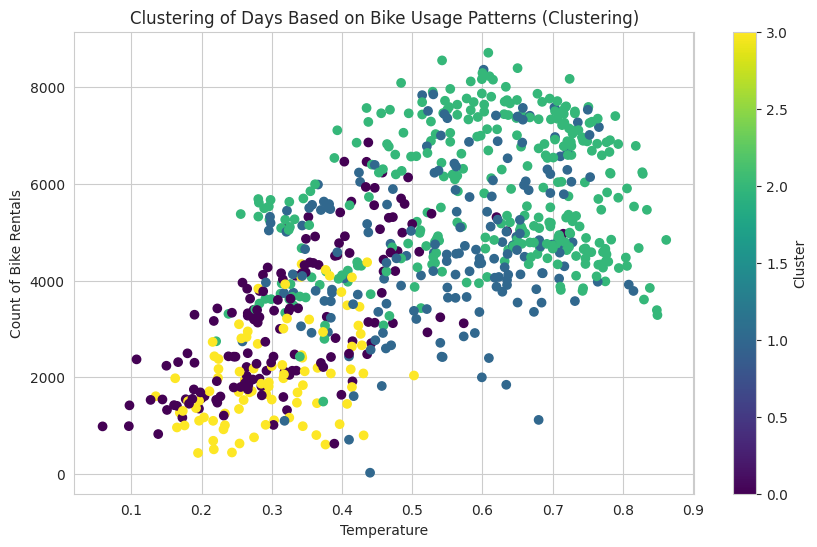

In [ ]:
# Langkah 5: Visualisasikan Hasil Clustering
# Memvisualisasikan hasil clustering
plt.figure(figsize=(10, 6))
plt.scatter(day_df['temp'], day_df['cnt'], c=day_df['cluster'], cmap='viridis')
plt.xlabel('Temperature')
plt.ylabel('Count of Bike Rentals')
plt.title('Clustering of Days Based on Bike Usage Patterns (Clustering)')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# Langkah 6: Analisis Ciri Khas dari Masing-Masing Kelompok
# Melakukan analisis karakteristik dari masing-masing kelompok
cluster_means = day_df.groupby('cluster').mean()
cluster_counts = day_df['cluster'].value_counts()

# Menampilkan statistik dan karakteristik dari setiap kelompok
print("Cluster Statistics:")
print(cluster_counts)
print("\nCluster Characteristics:")
print(cluster_means)

Cluster Statistics:
2    315
1    178
0    147
3     91
Name: cluster, dtype: int64

Cluster Characteristics:
            instant    season        yr      mnth   holiday   weekday  \
cluster                                                                 
0        272.666667  1.414966  0.482993  3.687075  0.040816  3.000000   
1        418.443820  3.106742  0.511236  8.140449  0.016854  2.893258   
2        419.561905  3.015873  0.539683  7.800000  0.028571  2.984127   
3        228.780220  1.252747  0.373626  3.494505  0.032967  3.241758   

         workingday  weathersit      temp     atemp       hum  windspeed  \
cluster                                                                    
0          0.666667    1.040816  0.326921  0.321520  0.475696   0.248122   
1          0.724719    2.073034  0.548410  0.522393  0.752488   0.181511   
2          0.673016    1.003175  0.600410  0.568519  0.600826   0.166190   
3          0.670330    2.000000  0.300251  0.301319  0.723738   0.19904

<ipython-input-71-98bd59a06c40>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = day_df.groupby('cluster').mean()


Conclusion:
Pengelompokan Hari-hari: Melalui penggunaan algoritma K-Means Clustering, kita berhasil mengelompokkan hari-hari dalam tahun berdasarkan pola penggunaan sepeda. Dalam contoh ini, kita menggunakan 4 cluster sebagai jumlah kelompok yang dihasilkan.

Visualisasi Hasil Clustering: Visualisasi scatterplot menunjukkan bahwa penggunaan sepeda pada hari-hari tertentu dapat dikelompokkan ke dalam cluster tertentu berdasarkan suhu dan jumlah penyewaan sepeda. Cluster-cluster ini memungkinkan kita untuk mengidentifikasi pola penggunaan sepeda yang serupa.

Karakteristik Kelompok: Analisis karakteristik dari masing-masing kelompok menunjukkan bahwa setiap kelompok memiliki ciri khasnya sendiri. Hal ini dapat membantu dalam memahami faktor-faktor yang memengaruhi pola penggunaan sepeda pada setiap kelompok. Misalnya, beberapa kelompok mungkin memiliki kecenderungan untuk digunakan pada suhu tertentu, sementara kelompok lain mungkin lebih sensitif terhadap kondisi cuaca.

Interpretasi: Interpretasi lebih lanjut dari hasil clustering dapat memberikan wawasan tentang bagaimana faktor-faktor seperti suhu, kelembaban, kecepatan angin, musim, dan kondisi cuaca mempengaruhi penggunaan sepeda pada hari-hari tertentu. Ini dapat digunakan untuk mengambil keputusan yang lebih baik dalam perencanaan penggunaan sepeda, pemasaran, dan manajemen persediaan.

In [ ]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
)
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,is_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


In [ ]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

In [ ]:
all_df.to_csv("main_data.csv", index=False)